<a href="https://colab.research.google.com/github/Malika44/Deep-Learning-/blob/main/Deep_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
vocab_size = 10000
max_length = 250
embedding_dim = 16

In [ ]:
# Load IMDB dataset
print("Loading IMDB dataset:")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

Loading IMDB dataset:
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Training Samples: {len(x_train)}")
print(f"Testing Samples: {len(x_test)}")
print(f"Sample Review Length: {len(x_train[0])}")

Training Samples: 25000
Testing Samples: 25000
Sample Review Length: 218


In [ ]:
#pad sequence to same length
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [ ]:
print(f"Shape after padding: {x_train.shape}")

Shape after padding: (25000, 250)


In [ ]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length, name='embedding_layer'),
    GlobalAveragePooling1D(name='global_avg_pooling'),
    Dense(16, activation='relu', name='hidden_dense'),
    Dropout(0.5, name='dropout_layer'),
    Dense(1, activation='sigmoid', name='output_layer')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pooling              │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense (Dense)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nTraining model...")
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Training model...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5776 - loss: 0.6763 - val_accuracy: 0.8336 - val_loss: 0.4749
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8159 - loss: 0.4479 - val_accuracy: 0.8650 - val_loss: 0.3316
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8705 - loss: 0.3340 - val_accuracy: 0.8838 - val_loss: 0.2930
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8947 - loss: 0.2914 - val_accuracy: 0.8740 - val_loss: 0.2960
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9075 - loss: 0.2567 - val_accuracy: 0.8806 - val_loss: 0.2894
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9196 - loss: 0.2382 - val_accuracy: 0.8690 - val_loss: 0.3203
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9284 - loss: 0.2147 - val_accuracy: 0.8700 - val_loss: 0.3238
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9366 - loss: 0.1959

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (32, 250, 16)          │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pooling              │ (32, 16)               │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense (Dense)            │ (32, 16)               │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (32, 16)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (32, 1)                │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,869 (1.83 MB)

 Trainable params: 160,289 (626.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,580 (1.22 MB)

In [ ]:
print("Evaluate on test set\n")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Evaluate on test set

Test Accuracy: 0.8659200072288513


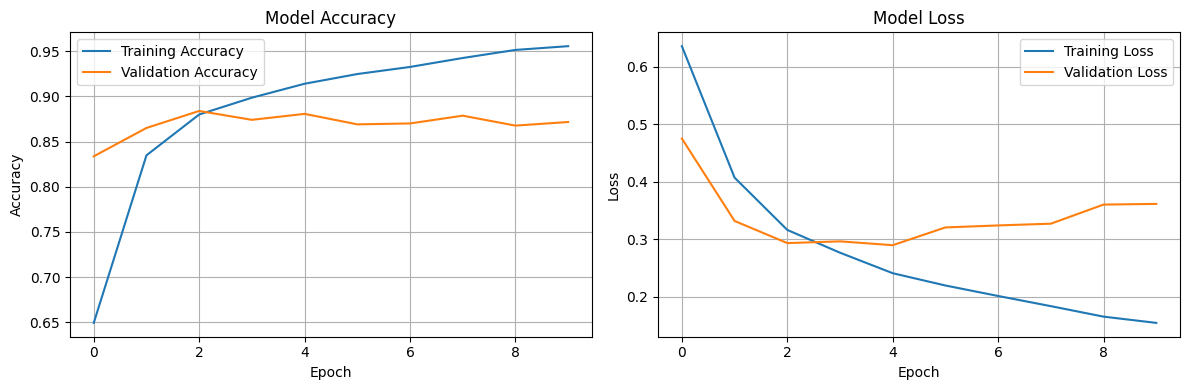

In [ ]:
#plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
#plot Accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend()
ax1.grid(True)
#plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Function to decode review back to text
def decode_review(encoded_review):
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for key, value in word_index.items()}
    decoded = ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])
    return decoded

In [ ]:
#Test predications on sample reviews
def predict_sentiment(review_text, model):
  prediction = model.predict(review_text.reshape(1, -1))[0][0]
  sentiment = "Positive" if prediction > 0.5 else "Negative"
  confidence = prediction if sentiment == "Positive" else 1 - prediction
  return sentiment, confidence

In [ ]:
#show test sample
print("SAMPLE PREDICTIONS")

for i in range(10):
    review = decode_review(x_test[i])
    actual = "Positive" if y_test[i] == 1 else "Negative"
    predicted_prob = model.predict(x_test[i:i+1], verbose=0)[0][0]
    predicted = "Positive" if predicted_prob > 0.5 else "Negative"
    confidence = predicted_prob if predicted_prob > 0.5 else 1 - predicted_prob

    print(f"\nReview {i+1}:")
    print(f"Text: {review[:200]}...")
    print(f"Actual: {actual}")
    print(f"Predicted: {predicted} (confidence: {confidence:.3f})")
    print(f"Correct: {'✓' if actual == predicted else '✗'}")


SAMPLE PREDICTIONS
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Review 1:
Text: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ...
Actual: Negative
Predicted: Negative (confidence: 0.649)
Correct: ✓

Review 2:
Text: focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbin...
Actual: Positive
Predicted: Positive (confidence: 1.000)
Correct: ✓

Review 3:
Text: king irritated ? sends them a ? br br delighted with this ? looking new king who towers above them the ? welcome him with a ? of ? dressed ? the mayor steps forward to hand him the key to the ? as ? c...
Actual: Positive
Predicted: Positive (confidence: 0.926)
Correct: ✓

Review 4:
Text: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 